In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scope_utils import set_scope, get_waveform, get_trace_data, TraceData
from Peak_Search import ini_peak_search, reso_det, mod_peak_search,zero_measure,fir_measure
from ds1054z import DS1054Z
import pyvisa
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import nidaqmx
import h5py
import time
from tqdm import tqdm
from typing import List, Tuple, Sequence
import csv

In [3]:
task = nidaqmx.Task()
task.ao_channels.add_ao_voltage_chan('Dev1/ao0','mychannel',0,5)
value = 4
task.start()
task.write(0)
task.stop()

In [4]:
resource_name_oscilloscope = "USB0::0x1AB1::0x04CE::DS1ZA212606333::INSTR"
rm = pyvisa.ResourceManager()
scope: pyvisa.resources.USBInstrument = rm.open_resource("USB0::0x1AB1::0x04CE::DS1ZA212606333::INSTR", read_termination = "\n")

In [5]:
def send_trig(task,trig_sleep,trig_val):
    task.start()
    task.write(0)
    time.sleep(trig_sleep)
    task.write(trig_val)
    time.sleep(trig_sleep)
    task.write(0)
    task.stop()


In [6]:
channels = [1,3]
degauss_period = 40
trig_period = 0.1
trig_val = 4

In [37]:
scope.write(":RUN")
time.sleep(1)
scope.write(":ACQuire:MDEPth 300000")

24

In [75]:
def get_data(osci,channel,degau_time):
    scope.write(":NORMAL")
    scope.write(":ACQuire:MDEPth 300000")
    time.sleep(5)
    send_trig(task,trig_period,trig_val)
    time.sleep(1.5*degau_time)
    time.sleep(2)
    data = get_trace_data(scope, [channel[0], channel[1]])
    return data


In [107]:
scope.write(":RUN")
time.sleep(2)
data1 = get_data(osci=scope,channel=channels,degau_time=degauss_period)

250000
250000


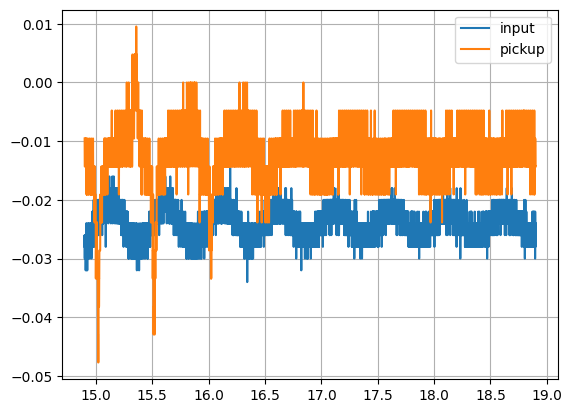

In [113]:
m = np.s_[100000:120000]
fig, ax=   plt.subplots()
ax.plot(data1.timestamp[m],data1.input[m],label= "input")
ax.plot(data1.timestamp[m],data1.pickup[m],label = "pickup")
ax.grid(True)
ax.legend()

In [109]:
print(data1.input[m])

[-0.026 -0.024 -0.024 ... -0.034 -0.034 -0.034]


In [117]:
send_trig(task,trig_period,trig_val)

In [118]:
off_set = [-20,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,20] # in mV
off_mea = [-42.56,-22.44,-20.47,-18.49,-16.42,-14.44,-12.45,-10.37,-8.40,-6.40,-4.34,-2.35,-0.36,1.72,3.69,5.68,7.72,9.72,11.72,12.83,15.81,17.82,38.03]

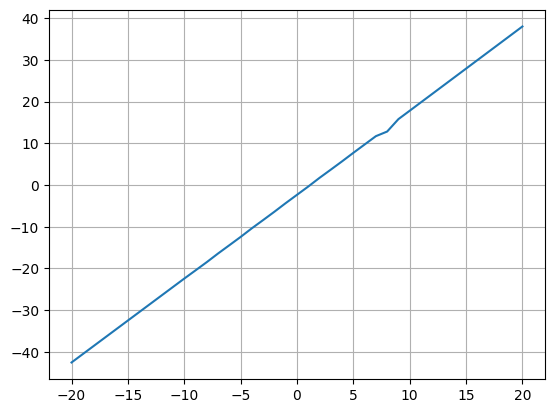

In [120]:
plt.plot(off_set,off_mea)
plt.grid(True)